# Feature Selection - Using Information Gain

## In Classification Problems

### Mutual Information
MI Estimate mutual information for a discrete target variable.

Mutual information (MI) between two random variables is a non-negative value, which measures the dependency between the variables. It is equal to zero if and only if two random variables are independent, and higher values mean higher dependency.

The function relies on nonparametric methods based on entropy estimation from k-nearest neighbors distances.

Inshort

A quantity called mutual information measures the amount of information one can obtain from one random variable given another.

The mutual information between two random variables X and Y can be stated formally as follows:

**I(X ; Y) = H(X) – H(X | Y) Where I(X ; Y) is the mutual information for X and Y, H(X) is the entropy for X and H(X | Y) is the conditional entropy for X given Y. The result has the units of bits.**

In [39]:
import pandas as pd
from sklearn.feature_selection import mutual_info_classif, SelectKBest

In [40]:
df=pd.read_csv('https://gist.githubusercontent.com/tijptjik/9408623/raw/b237fa5848349a14a14e5d4107dc7897c21951f5/wine.csv')
df.head()

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [41]:
df['Wine'].unique()

array([1, 2, 3])

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Wine                  178 non-null    int64  
 1   Alcohol               178 non-null    float64
 2   Malic.acid            178 non-null    float64
 3   Ash                   178 non-null    float64
 4   Acl                   178 non-null    float64
 5   Mg                    178 non-null    int64  
 6   Phenols               178 non-null    float64
 7   Flavanoids            178 non-null    float64
 8   Nonflavanoid.phenols  178 non-null    float64
 9   Proanth               178 non-null    float64
 10  Color.int             178 non-null    float64
 11  Hue                   178 non-null    float64
 12  OD                    178 non-null    float64
 13  Proline               178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [43]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df.drop(labels=['Wine'], axis=1),
    df['Wine'],
    test_size=0.3,
    random_state=0)

In [44]:
X_train.head()

,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
22,13.71,1.86,2.36,16.6,101,2.61,2.88,0.27,1.69,3.80,1.11,4.00,1035
108,12.22,1.29,1.94,19.0,92,2.36,2.04,0.39,2.08,2.70,0.86,3.02,312
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
145,13.16,3.57,2.15,21.0,102,1.50,0.55,0.43,1.30,4.00,0.60,1.68,830
71,13.86,1.51,2.67,25.0,86,2.95,2.86,0.21,1.87,3.38,1.36,3.16,410


In [45]:
# determine the mutual information
mutual_info = mutual_info_classif(X_train, y_train)
mutual_info

array([0.41380279, 0.31118069, 0.17793865, 0.24940589, 0.20753312,
       0.46370957, 0.72135468, 0.07984366, 0.27109783, 0.62103642,
       0.57380637, 0.54056781, 0.53934383])

In [46]:

mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)

Flavanoids              0.721355
Color.int               0.621036
Hue                     0.573806
OD                      0.540568
Proline                 0.539344
Phenols                 0.463710
Alcohol                 0.413803
Malic.acid              0.311181
Proanth                 0.271098
Acl                     0.249406
Mg                      0.207533
Ash                     0.177939
Nonflavanoid.phenols    0.079844
dtype: float64

<Axes: >

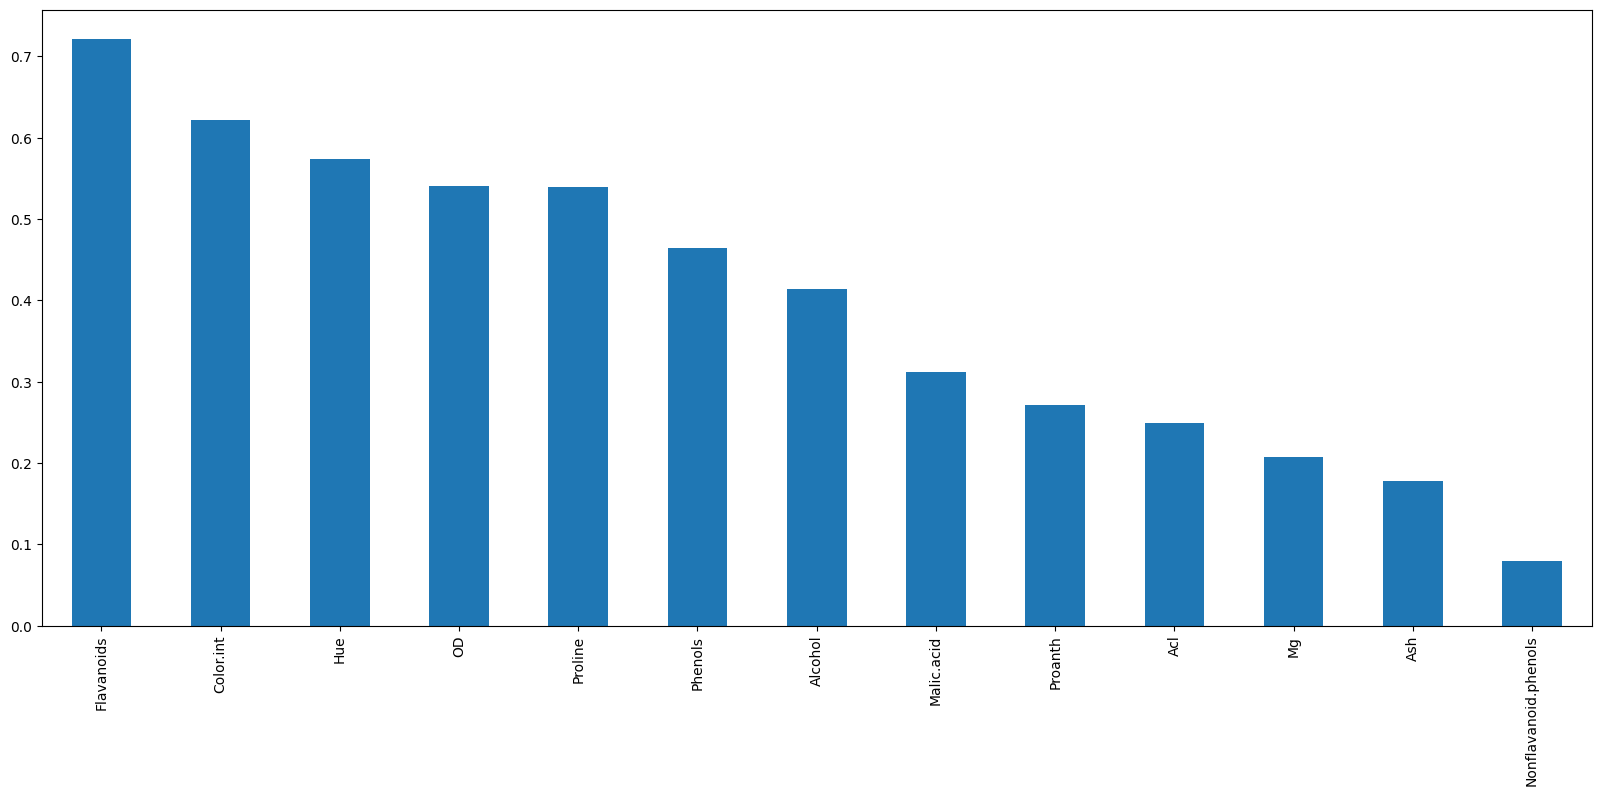

In [47]:
#let's plot the ordered mutual_info values per feature
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20, 8))

In [48]:
# we Will select the  top 5 important features
sel_five_cols = SelectKBest(mutual_info_classif, k=5)
sel_five_cols.fit(X_train, y_train)
X_train.columns[sel_five_cols.get_support()]

Index(['Flavanoids', 'Color.int', 'Hue', 'OD', 'Proline'], dtype='object')

#### Difference Between Information Gain And Mutual Information
I(X ; Y) = H(X) – H(X | Y) and IG(S, a) = H(S) – H(S | a)

As such, mutual information is sometimes used as a synonym for information gain. Technically, they calculate the same quantity if applied to the same data.

## In Regression Problems

### Mutual Information
Estimate mutual information for a continuous target variable.

Mutual information is calculated between two variables and measures the reduction in uncertainty for one variable given a known value of the other variable. It is a non-negative value, which measures the dependency between the variables. It is equal to zero if and only if two random variables are independent, and higher values mean higher dependency.

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_regression, SelectPercentile

In [50]:
df = pd.read_csv('../helpers/data/house_prices.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [52]:
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

Selecting just numerical features just for practice, cause we don't want to use encoding for now.

In [53]:
numeric_lst=['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerical_cols = list(df.select_dtypes(include=numeric_lst).columns)

In [54]:
len(numerical_cols)

38

In [55]:
df = df[numerical_cols]
df.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


In [56]:
df = df.drop("Id", axis=1)

In [58]:
X_train, X_test, y_train, y_test = train_test_split(
        df.drop(labels=['SalePrice'], axis=1),
        df['SalePrice'],
        test_size=0.3,
        random_state=0
    )    

In [59]:
X_train

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
64,60,NaN,9375,7,5,1997,1998,573.0,739,0,...,645,576,36,0,0,0,0,0,2,2009
682,120,NaN,2887,6,5,1996,1997,0.0,1003,0,...,431,307,0,0,0,0,0,0,11,2008
960,20,50.0,7207,5,7,1958,2008,0.0,696,0,...,0,117,0,0,0,0,0,0,2,2010
1384,50,60.0,9060,6,5,1939,1950,0.0,204,0,...,280,0,0,0,0,0,0,0,10,2009
1100,30,60.0,8400,2,5,1920,1950,0.0,290,0,...,246,0,0,0,0,0,0,0,1,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,60,82.0,9430,8,5,1999,1999,673.0,1163,0,...,856,0,128,0,0,180,0,0,7,2009
835,20,60.0,9600,4,7,1950,1995,0.0,442,0,...,436,290,0,0,0,0,0,0,2,2010
1216,90,68.0,8930,6,5,1978,1978,0.0,0,0,...,539,0,0,0,0,0,0,0,4,2010
559,120,NaN,3196,7,5,2003,2004,18.0,0,0,...,420,143,20,0,0,0,0,0,10,2006


In [60]:
X_train.isnull().sum()

MSSubClass         0
LotFrontage      189
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         5
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       54
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
dtype: int64

In [61]:
mutual_info = mutual_info_regression(X_train.fillna(0), y_train)
mutual_info

array([0.25044609, 0.21813289, 0.16483193, 0.53901985, 0.10226271,
       0.35521066, 0.24349809, 0.09770879, 0.16263822, 0.00112454,
       0.11165764, 0.38225596, 0.31273419, 0.2399727 , 0.00693679,
       0.48199422, 0.01835279, 0.        , 0.27096364, 0.07183206,
       0.0384006 , 0.03048852, 0.19073508, 0.17389007, 0.26564944,
       0.37013702, 0.3656589 , 0.06426804, 0.16941906, 0.01174972,
       0.        , 0.02142771, 0.01603441, 0.        , 0.        ,
       0.01434254])

In [62]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)

OverallQual      0.539020
GrLivArea        0.481994
TotalBsmtSF      0.382256
GarageCars       0.370137
GarageArea       0.365659
YearBuilt        0.355211
1stFlrSF         0.312734
FullBath         0.270964
GarageYrBlt      0.265649
MSSubClass       0.250446
YearRemodAdd     0.243498
2ndFlrSF         0.239973
LotFrontage      0.218133
TotRmsAbvGrd     0.190735
Fireplaces       0.173890
OpenPorchSF      0.169419
LotArea          0.164832
BsmtFinSF1       0.162638
BsmtUnfSF        0.111658
OverallCond      0.102263
MasVnrArea       0.097709
HalfBath         0.071832
WoodDeckSF       0.064268
BedroomAbvGr     0.038401
KitchenAbvGr     0.030489
ScreenPorch      0.021428
BsmtFullBath     0.018353
PoolArea         0.016034
YrSold           0.014343
EnclosedPorch    0.011750
LowQualFinSF     0.006937
BsmtFinSF2       0.001125
BsmtHalfBath     0.000000
3SsnPorch        0.000000
MiscVal          0.000000
MoSold           0.000000
dtype: float64

<Axes: >

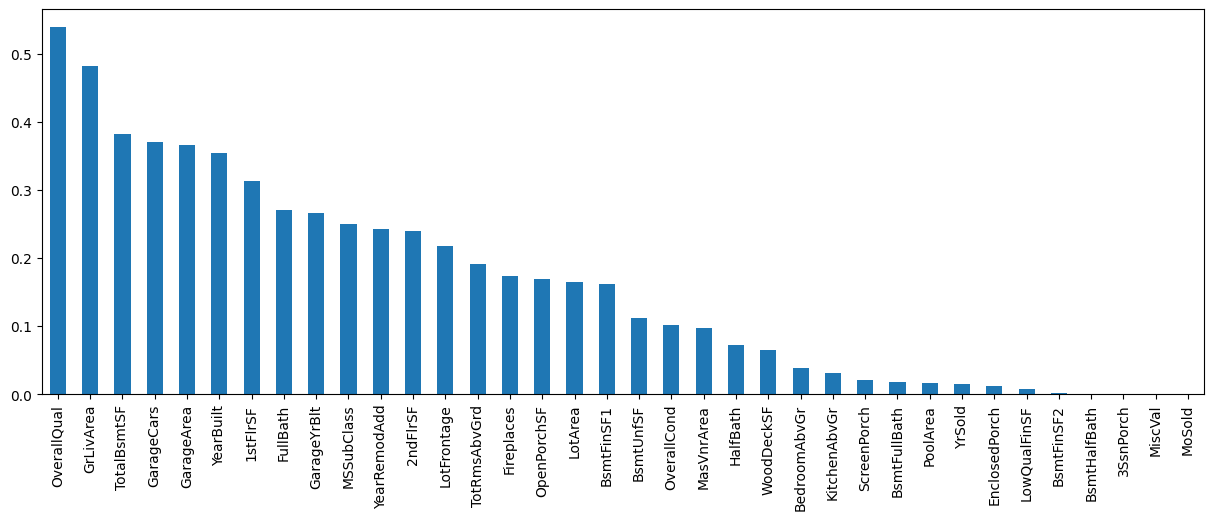

In [64]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(15, 5))

In [65]:
## Selecting the top 20 percentile
selected_top_columns = SelectPercentile(mutual_info_regression, percentile=20)
selected_top_columns.fit(X_train.fillna(0), y_train)

,score_func,<function mut...002682A43CD60>
,percentile,20


In [66]:
X_train.columns[selected_top_columns.get_support()]

Index(['OverallQual', 'YearBuilt', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea',
       'GarageCars', 'GarageArea'],
      dtype='object')